In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate
from scipy.integrate import quad

from astropy import units as u
from astropy import constants as c

import matplotlib.pyplot as plt

from progressbar import ProgressBar

In [2]:
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif'
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

# Q1(a-c)

In [8]:
def cosmo(wr0): 
    
    H0 = 67.8 *u.km/u.s/u.Mpc
    # wr0 = 9.03*10**(-5)
    wm0 = 0.306
    wl0 = 0.692
    w0 = 1
    
    # Q1(a)
    def t0(H0,wm0):
        result = 2. * H0**(-1.) * np.log(np.sqrt(((1.-wm0)+1.) / np.sqrt(wm0))) / (3.*np.sqrt(1.-wm0))
        return result.to(u.Gyr)

    print ('t0 =',t0(H0,wm0))

    # Q1(b)
    def t(a):
        result = 1/ (H0*(np.sqrt(wr0*a**(-2.) + wm0*a**(-1.) + wl0*a**2. + (1-w0))))
        return result.to(u.yr).value

    def t_int(a):
        result = quad(t,0,a)[0]
        return result
    p = ProgressBar()
    a_list = np.logspace(-5,10,100)
    t_list = [t_int(a) for a in p(a_list)]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.set_xlabel('t (yr)',fontsize = 20)
    ax.set_ylabel('a',fontsize = 20)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e3,4e11)
    ax.plot(t_list,a_list)
    plt.show()

    z_list = (1/a_list) - 1

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.set_xlabel('t (yr)')
    ax.set_ylabel('z')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e3,4e11)
    ax.plot(t_list,z_list)
    plt.show()

    # Q1(c)

    print('age of the universe = ', t_int(1), 'years')
    return a_list,t_list

t0 = 6.458251247353598 Gyr


100% |########################################################################|


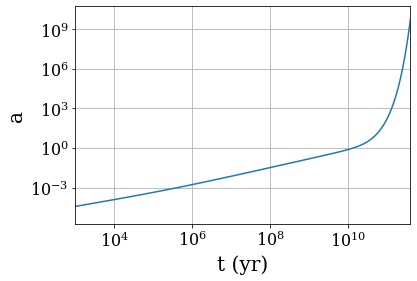

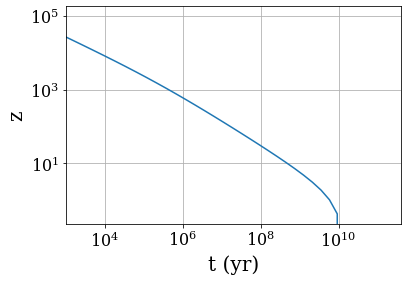

age of the universe =  13827244193.955175 years


In [9]:
a_list,t_list = cosmo(9.03*10**(-5))

# Q1(d)

t0 = 6.458251247353598 Gyr


100% |########################################################################|


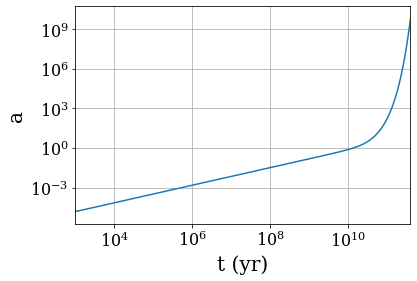

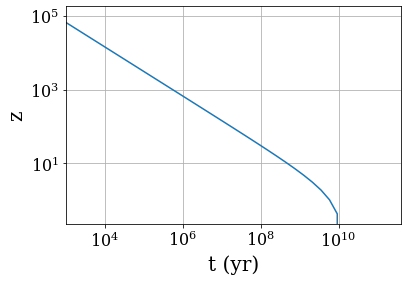

age of the universe =  13833142418.74652 years


(array([1.00000000e-05, 1.41747416e-05, 2.00923300e-05, 2.84803587e-05,
        4.03701726e-05, 5.72236766e-05, 8.11130831e-05, 1.14975700e-04,
        1.62975083e-04, 2.31012970e-04, 3.27454916e-04, 4.64158883e-04,
        6.57933225e-04, 9.32603347e-04, 1.32194115e-03, 1.87381742e-03,
        2.65608778e-03, 3.76493581e-03, 5.33669923e-03, 7.56463328e-03,
        1.07226722e-02, 1.51991108e-02, 2.15443469e-02, 3.05385551e-02,
        4.32876128e-02, 6.13590727e-02, 8.69749003e-02, 1.23284674e-01,
        1.74752840e-01, 2.47707636e-01, 3.51119173e-01, 4.97702356e-01,
        7.05480231e-01, 1.00000000e+00, 1.41747416e+00, 2.00923300e+00,
        2.84803587e+00, 4.03701726e+00, 5.72236766e+00, 8.11130831e+00,
        1.14975700e+01, 1.62975083e+01, 2.31012970e+01, 3.27454916e+01,
        4.64158883e+01, 6.57933225e+01, 9.32603347e+01, 1.32194115e+02,
        1.87381742e+02, 2.65608778e+02, 3.76493581e+02, 5.33669923e+02,
        7.56463328e+02, 1.07226722e+03, 1.51991108e+03, 2.154434

In [5]:
cosmo(0)

In [6]:
print('difference in age of the universe = ', 13827244193.955175 - 13833142418.74652, 'years')

difference in age of the universe =  -5898224.791343689 years


# Q1(e)

In [7]:
# H(t)=adot/a

da = a_list[1:]-a_list[:-1]
dt = t_list[1:]-t_list[:-1]
mida = (a_list[1:]-a_list[:-1])/2
H = (da)/(mida * dt)

TypeError: unsupported operand type(s) for -: 'list' and 'list'